In [17]:
from tensorflow import keras
import cv2
from PIL import Image
import numpy as np
import pickle
import matplotlib.pyplot as plt

# It can be used to reconstruct the model identically.
encoder = keras.models.load_model("models/encoder", compile=False)


In [12]:
img = cv2.imread('data/husky4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
img_array = Image.fromarray(img, 'RGB')
            
#resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
resized_img = img_array.resize((232, 232))

resized_img_array = np.array(resized_img)/255.

x = np.expand_dims(resized_img_array, axis=0)

x = np.expand_dims(x, axis=-1)

pred = encoder.predict(x)

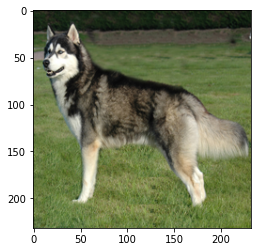

In [18]:
plt.imshow(resized_img)

In [19]:
nn = pickle.load(open("knn_01.pkl", "rb"))

In [20]:
preds = nn.kneighbors(pred.reshape(1,6728))[1]

In [27]:
preds[0].tolist()

[2204, 669, 639, 1841, 369, 1197, 185, 379, 136, 2282]

In [22]:
# load numpy array from npy file
from numpy import load
# load array
x_train = load('x_train.npy')
y_train = load('y_train.npy')

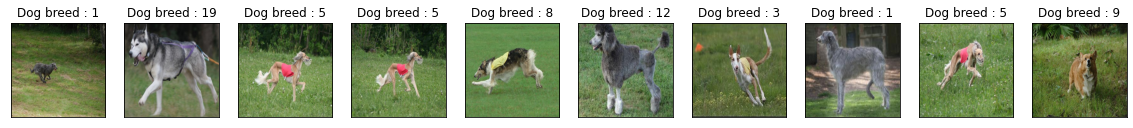

In [23]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.title('Dog breed : {}'.format(y_train[preds[0,i]]))
    plt.imshow(x_train[preds[0,i]])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()